## Assignment 2

In this assignment, we are asking you to make estimates for what to expect when doing orbit integrations. This will rely on some of the math that we went over at the first meeting. You should be able to find those slides on the StreamTeam Google Drive, which is linked in the Slack "General" channel bookmarks (above all the messages).

Using some of the equations that we learned about last week, we should be able to make predictions about the orbits of individual stars. This will help us understand how streams form and also give allow us to compare our code results to expectations once we start to make streams in Gala.

I will guide you through writing the code for the first question and you should use the coding techniques (commenting, printing answers, keeping track of units, function writing (optional)) introduced there when finding the answers to questions 2 and 3.

First let's import the normal packages that we always use

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gala (this is not strictly necessary, since this notebook doesn't use Gala, but a good habit)
import gala
import gala.dynamics as gd
import gala.potential as gp

#### Quick Background

As we have seen, streams are made up of stars that were once either dwarf galaxies or globular clusters. We can refer to either one of these as "satellites" that orbit the Milky Way. On those orbits, satellite stars are *tidally stripped*, forming streams. The stars are stripped when the "pull" from the host galaxy is stronger than the gravitational force within the satellite itself. When that happens to a star, it will separate from its satellite and become part of a stream of stars undergoing the same fate. THe overcoming of the gravitational force of the satellite on a given star will happen at a certain radius from the center of the satellite, called the *tidal radius*. The *tidal radius* at which stars are lost from the satellite is given by the formula $$r_{tide} \sim (\frac{m_{sat}}{M_{gal}})^{1/3} R$$

#### Question 1

Calculate $r_{tide}$ for two satellites, one with mass $m_{sat} = 10^5 M_{\odot}$ and one with mass $m_{sat} = 10^9 M_{\odot}$ orbiting a galaxy of mass $M_{gal} = 5 \times 10^{11} M_{\odot}$ at $R_0 = 30$ kpc

In [3]:
# write code below to calculate r_tide. 
#  Call r_tide for the smaller satellite r_tide1 and r_tide for the larger one r_tide2
msat_small = 1e5 # mass for smaller satellite
msat_large = 1e9 # mass for larger satllite 
mgal = 5e11 # mass of central galaxy
R = 30 # orbital radius

r_tide1 = (msat_small/mgal)**(1/3) * R # Tidal Radius for smaller satellite
r_tide2 = (msat_large/mgal)**(1/3) * R # Tidal radius for larger satellite

# Quick check: What units is your answer in? 
#  You didn't need to code units into your code specifically, 
#   but you should always make sure you know what units you are working with. 
#  If it isn't already, make sure that r_tide1 and r_tide2 are in kpc, 
#   so that the two lines of output at the end of this cell are correct

# End your code with these two lines to output your results:
print('Smaller satellite r_tide = {} kpc'.format(r_tide1))
print('Larger satellite r_tide = {} kpc'.format(r_tide2))

Smaller satellite r_tide = 0.175441064292772 kpc
Larger satellite r_tide = 3.7797631496846193 kpc


Now that you've written your code let's do a guided practice with function writing in python if you aren't familiar with it already. Try to write a function that takes in as variables the satelite mass, galaxy mass, and radius from galaxy center, and outputs the tidal radius.

In [4]:
# Here is the basic structure of your code to write functions:

# Make sure to change the names of the functions and parameters to things 
#  that make sense for you and anyone reading your code
    
def tidal_radius(Msat, Mgal, R): 
    # use the code you've written above to go from your inputed parameters to the output
    r_tide = (Msat/Mgal)**(1/3) * R

    return r_tide # this outputs you the tidal radius for your inputed parameters

As a test, you should now be able to run the following cell, after changing the name of your function

In [5]:
r_tide1 = tidal_radius(10**5, 5*10**11, 30)
r_tide2 = tidal_radius(10**9, 5*10**11, 30)

print('Smaller satellite r_tide = {} kpc'.format(r_tide1))
print('Larger satellite r_tide = {} kpc'.format(r_tide2))

# this should output exactly the same thing as your initial code 
#  but it has the advantage that you can now easily try out other values for m_sat, m_gal, and R

Smaller satellite r_tide = 0.175441064292772 kpc
Larger satellite r_tide = 3.7797631496846193 kpc


Pick one of the two satellites and use the function you just wrote to answer: What happens when to $r_{tide}$ when you decrease the radius of the satellite to 5 kpc? What if you increase it to 100 kpc?

In [6]:
# Write your code below using the function you defined earlier
r_tide_inner = tidal_radius(10**5, 5*10**11, 5)
r_tide_outer = tidal_radius(10**5, 5*10**11, 100)

print('Inner satellite r_tide = {} kpc'.format(r_tide_inner))
print('Outer satellite r_tide = {} kpc'.format(r_tide_outer))

Inner satellite r_tide = 0.029240177382128668 kpc
Outer satellite r_tide = 0.5848035476425734 kpc


#### Question 2

From the previous assignment, you should have some functions written for the Hernquist potential using the Keplerian potential used in "Leapfrog_tutorial" as a guide. Apply those functions for the potential, acceleration, and circular velocity to complete this question. 

For each satellite from the previous question, what is the difference in the orbital period $T$ for stars that end up in the trailing (at $R = R_0 + r_{tide}$) and leading (at $R = R_0 - r_{tide}$) streams? Assume that the satellites are on a circular orbit, meaning you can use one of the formulas for $T$ in the slides (or at the end of the "Leapfrog_tutorial" notebook).

What is the difference in energy for those two galaxies? Use the formula for total energy $$E = \frac{1}{2} v_{circ}^2 + \Phi(R \pm r_{tide})$$ where $\Phi$ represents the Hernquist potential.

In [7]:
# Copied funcions from last time
def Hernquist_potential(M, x, y, c, G):
    """
    Parameters
    ----------
    mass : float
        mass of central body
    x : array
        x-postions
    y : array
        y-postions
    G : float
        Gravitational Constant  
        
    Returns
    ----------
    ax : array
    Potential value 
    """
    r = np.sqrt(x**2 + y**2)
    return (-G*M)/r+c

# Calculate acceleration given position coordinates
def Hernquist_accel(M, x, y, c, G):
    """
    Parameters
    ----------
    mass : float
        mass of central body
    x : array
        x-postions
    y : array
        y-postions
    G : float
        Gravitational Constant  
        
    Returns
    ----------
    ax : array
        x-accelerations 
    ay : array
        y-accelerations 
    """
    
    # Little trick here -- the following line give you the Cartesian accelerations for 
    # any spherical potential
    # Just replace dr with the derivative of the potential with respect to r (dPhi/dr)
    r = np.sqrt(x**2 + y**2)
    dr = (G*M)/(r+c)**2 # Derivative of potential
    ax = -dr * (x/r)
    ay = -dr * (y/r)
    
    return ax, ay

# Calculate circular velocity in Hernquist Potential given position coordinates
def circular_velocity(M, x, y, c, G):
    """
    Parameters
    ----------
    mass : float
        mass of central body
    x : array
        x-postions
    y : array
        y-postions
    G : float
        Gravitational Constant  
        
    Returns
    ----------
    vc : array
        circular velocity
    """
    r = np.sqrt(x**2 + y**2)
    return np.sqrt((G*M * r) / (r+c)**2)

# Calculate period of circular orbit in Hernquist potential given position coordinates
def time_period(M, x, y, c, G):
    """
    Parameters
    ----------
    mass : float
        mass of central body
    x : array
        x-postions
    y : array
        y-postions
    G : float
        Gravitational Constant  
        
    Returns
    ----------
    vc : array
        time period of a circular orbit
    """
    r = np.sqrt(x**2 + y**2)
    vcirc = np.sqrt((G*M*r) / (r+c)**2)
    return (2*np.pi*r) / vcirc

In [8]:
# Radius for leading and trailing stream (R+-Rtide from first question)
Rplus_1 = R + r_tide1 #trailing for satellite 1
Rminus_1 = R - r_tide1 #leading for satellite 1

Rplus_2 = R + r_tide2 #trailing for satellite 2
Rminus_2 = R - r_tide2 #leading for satellite 2

G = 62.2e-8 #assumed value for gravitational constant

# Calculate circular velocity and time period for trailing/leading stream of each satllite
vcirc_plus1 = circular_velocity(mgal, Rplus_1, 0, 15, G) 
vcirc_minus1 = circular_velocity(mgal, Rminus_1, 0, 15, G)

T_plus1 = time_period(mgal, Rplus_1, 0, 15, G)
T_minus1 = time_period(mgal, Rminus_1, 0, 15, G)

vcirc_plus2 = circular_velocity(mgal, Rplus_2, 0, 15, G)
vcirc_minus2 = circular_velocity(mgal, Rminus_2, 0, 15, G)

T_plus2 = time_period(mgal, Rplus_2, 0, 15, G)
T_minus2 = time_period(mgal, Rminus_2, 0, 15, G)

# Estimate differences 
t_diff1 = T_plus1 - T_minus1
t_diff2 = T_plus2 - T_minus2

print('difference in time period for smaller satellite =', t_diff1)
print('difference in time period for larger satellite =', t_diff2)

difference in time period for smaller satellite = 0.03789302999240052
difference in time period for larger satellite = 0.8161499033189736


In [9]:
# Plug terms into given formula for total energy
Eplus_1 = 0.5*vcirc_plus1**2 + Hernquist_potential(mgal, Rplus_1, 0, 15, G)
Eminus_1 = 0.5*vcirc_minus1**2 + Hernquist_potential(mgal, Rminus_1, 0, 15, G)

Eplus_2 = 0.5*vcirc_plus2**2 + Hernquist_potential(mgal, Rplus_2, 0, 15, G)
Eminus_2 = 0.5*vcirc_minus2**2 + Hernquist_potential(mgal, Rminus_2, 0, 15, G)

# Take difference
E_diff1 = Eplus_1 - Eminus_1
E_diff2 = Eplus_2 - Eminus_2

print('difference in total energy for smaller satellite =', E_diff1)
print('difference in total energy for larger satellite =', E_diff2)

difference in total energy for smaller satellite = 112.27212488409259
difference in total energy for larger satellite = 2462.2672455639113


#### Question 3

Roughly how long (in angle around the galaxy) do you think your streams should be after 1 orbit? After 10 orbits?

Hint: You'll need to find the angular velocity difference of stars in the leading and trailing streams from your answer to **Question 2**.

In [11]:
# Angular velocity is omega = 2pi / time period
omega_plus1 = 2*np.pi / T_plus1
omega_minus1 = 2*np.pi / T_minus1

omega_diff1 = omega_plus1 - omega_minus1 # difference in angular velocity for smaller satellite

omega_plus2 = 2*np.pi / T_plus2
omega_minus2 = 2*np.pi / T_minus2

omega_diff2 = omega_plus2 - omega_minus2 # difference in angular velocity for larger satellite

T = time_period(mgal, R, 0, 15, G) # Time period of satellite orbit

# Get length of stream from the angular separation between the leading and trailing stream after one orbit
L1 = omega_diff1 * T
L2 = omega_diff2 * T

print('Length of stream for smaller satellite after 1 orbit = {} radians'.format(abs(L1)))
print('Length of stream for larger satellite after 1 orbit = {} radians'.format(abs(L2)))

# same procedure as above but now after 10 orbits
L1_10 = omega_diff1 * (10*T)
L2_10 = omega_diff2 * (10*T)

print('Length of stream for smaller satellite after 10 orbits = {} radians'.format(abs(L1_10)))
print('Length of stream for larger satellite after 10 orbits = {} radians'.format(abs(L2_10)))

Length of stream for smaller satellite after 1 orbit = 0.08573939499712348 radians
Length of stream for larger satellite after 1 orbit = 1.874677183781147 radians
Length of stream for smaller satellite after 10 orbits = 0.8573939499712347 radians
Length of stream for larger satellite after 10 orbits = 18.74677183781147 radians


## Note on leading and trailing tails

In streams, the leading tail is formed by either the outer or inner part of the satellite as those stars get stripped. However, there is not a hard and fast rule about which tail is formed by which part. This is because of the circular velocity curve and how it changes with radius. The only thing that is consistently true is that for any potential, the part of the stream that is moving faster is the leading tail while the part moving slower is the trailing tail.

In a Keplarian potential, the leading tail is always formed from the part of the stream that is closer to the center of the galaxy. This is because the circular velocity is always decreasing with increasing radius, as we can see from the following plot:

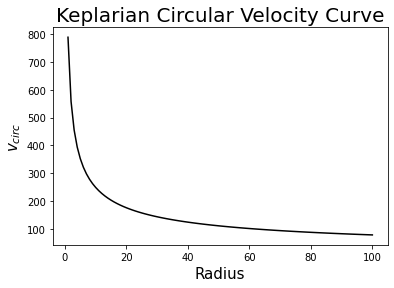

In [21]:
# Calculate circular velocity in Keplerian Potential given a radius
def circ_vel_kepler(M, r, G):
    return np.sqrt((G*M) / r)

rs = np.linspace(1,100,100)
plt.plot(rs, circ_vel_kepler(1e12, rs, G), c='k')
plt.xlabel('Radius', fontsize=15)
plt.ylabel(r'$v_{circ}$', fontsize = 15)
plt.title('Keplarian Circular Velocity Curve', fontsize=20)
plt.show()

However, in a Herquist potential (and most others) the circular velocity is not always decreasing with radius. In fact, up until the scale radius, the circular velocity is increasing, and it only starts decreasing after this point. You should be able to convince yourself of the mathematics of this by taking a derivative of the circular velocity equation. 

Conceptually, you should think about why this is. With a point source like in the Kepler potential, the farther you get from the point, the smaller the force on you, meaning that you need to be moving slower to stay bound to the galaxy. But if your mass is extended, then the mass is all around you and that is no longer necessarily the case. There is now also mass on the "outside" of your orbit that is "encouraging" you to speed up. Try to make sure that this makes sense conceptually. Hopefully this also makes you understand why the scale radius is an important physical quantity and not just a random number we assign to galaxies

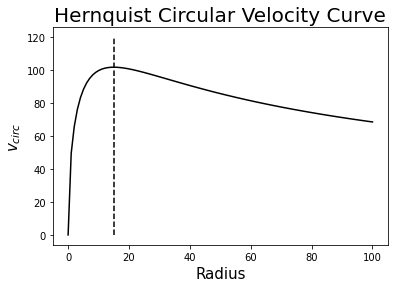

In [22]:
def circ_vel_hernquist(M, r, c, G):
    return np.sqrt((G*M*r) / (r+c)**2)

rs = np.linspace(0,100,100)
plt.plot(rs, circ_vel_hernquist(1e12, rs, 15, G), c='k')
plt.vlines(15, 0, 120, color='k', linestyles='--')
plt.xlabel('Radius', fontsize=15)
plt.ylabel(r'$v_{circ}$', fontsize = 15)
plt.title('Hernquist Circular Velocity Curve', fontsize=20)
plt.show()